The following notebook demostrates svc using QSVM and quantum kernel. 

In [ ]:
from qiskit.utils import algorithm_globals
import random 
import numpy as np
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit.primitives import Sampler
from qiskit import *
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel, QuantumKernel
from qiskit_machine_learning.algorithms.classifiers import QSVC
from functools import reduce
import matplotlib.pyplot as plt

algorithm_globals.random_seed = 1222
adhoc_dimension = 2

def plotDatasetCircles(no_of_circles: int, no_of_points: int):
    points = []
    labels = []
    test_points = []
    test_labels = []
    center = 0
    radius = 0
    
    for i in range(no_of_circles):
        radius += random.uniform(1,100)
        for j in range(int(no_of_points*0.8)):
            theta = random.uniform(0, 360)
            points.append([center+radius*np.cos(theta), center+radius*np.sin(theta)])
            labels.append(i)
        for j in range(int(no_of_points*0.2)):
            theta = random.uniform(0, 360)
            test_points.append([center+radius*np.cos(theta), center+radius*np.sin(theta)])
            test_labels.append(i)            

    return np.array(points), np.array(labels),  np.array(test_points), np.array(test_labels)

data, labels, testd, testl = plotDatasetCircles(2, 2000)


/var/folders/n5/sr7wwb8n1wggd7jsk_k37l_w0000gn/T/ipykernel_2924/219174258.py:8: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.state_fidelities import ComputeUncompute


In [ ]:
def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    ax.scatter(
        features[np.where(labels[:] == class_label), 0],
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )

def plot_dataset(train_features, train_labels, test_feature, test_label, adhoc_total):
    plt.figure(figsize=(5, 5))

    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")
    plot_features(plt, test_feature, test_label, 0, "s", "b", "w", "A test")
    plot_features(plt, test_feature, test_label, 1, "o", "r", "w", "A test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()

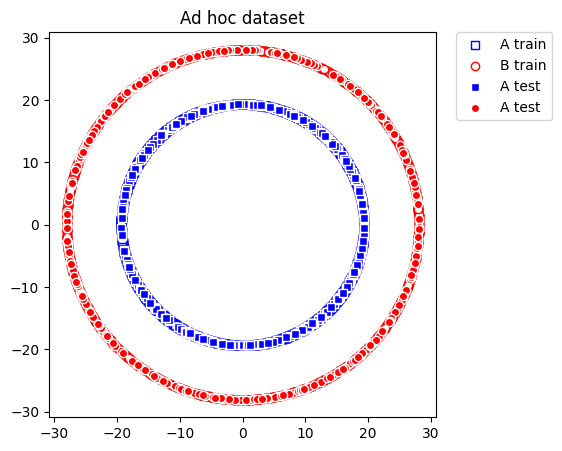

In [ ]:
plot_dataset(data, labels, testd, testl, len(data))


In [ ]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="full")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)


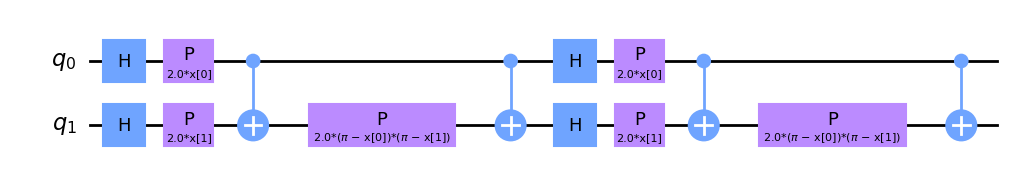

In [ ]:
adhoc_feature_map.decompose().draw(fold=1000, output="mpl")

In [6]:
qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc.fit(data, labels)

adhoc_score_callable_function = qsvc.score(testd, testl)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

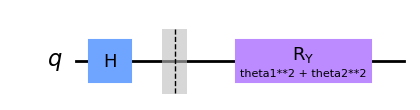

In [ ]:
from qiskit.circuit import Parameter,ControlledGate
 
QC = QuantumCircuit(1)

theta1 = Parameter('theta1')
theta2 = Parameter('theta2')

QC.h(0)
QC.barrier()

QC.ry(theta1*theta1+theta2*theta2, 0)

QC.draw(output="mpl")

In [ ]:
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=QC)

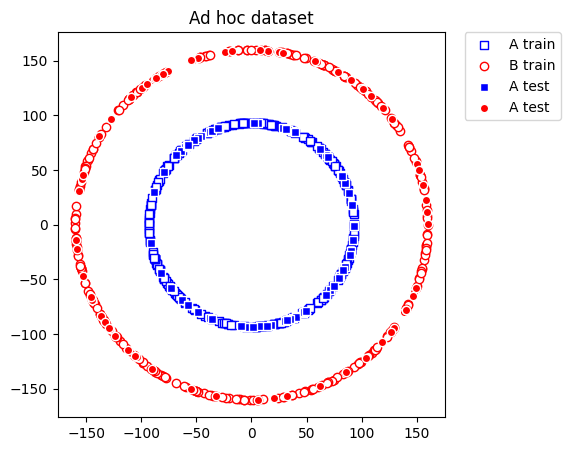

In [ ]:
data, labels, testd, testl = plotDatasetCircles(2, 360)
plot_dataset(data, labels, testd, testl, len(data))

In [ ]:
qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc.fit(data, labels)

adhoc_score_callable_function = qsvc.score(testd, testl)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

Callable kernel classification test score: 1.0
